In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
sys.path.append(os.path.abspath("/Users/miraliu/Desktop/PostDocCode/PartialNephrectomy_Python"))
sys.path.append(os.path.abspath("/Users/miraliu/Desktop/PostDocCode/RenalAllograft_Python"))

#sys.path.append('../')
from ML_UsefulFunctions import *
from KidneyROIAnalyses import *
from RenalAllograftFunctions import *
from DataLeakageCorrections import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format

from scipy.stats import f_oneway

from collections import Counter
from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")

In [58]:
def NoiseRice(I,sigma): # noise with rician distribution
    N = [] 
    #v = .79 # calculated from images on 6/11/19
    #sigma = .013 #(std of noise measured!)
    #v = 0.00434 #scaled = .79/182
    v = .005816 #scaled 6/27/19
    b = v/sigma
    r = rice.rvs(b, scale = sigma, size=len(I))
    for i in range(0,len(I)):
        N.append(I[i] +r[i]) #SNR = 1,10,22,100,150,inf
    return N/N[0]

In [60]:
def NoiseRice_sigsquare(I,sigma): # noise with rician distribution
    N = [] 
    #v = .79 # calculated from images on 6/11/19
    #sigma = .013 #(std of noise measured!)
    #v = 0.00434 #scaled = .79/182
    v = .005816 #scaled 6/27/19
    b = v/sigma**2
    r = rice.rvs(b, scale = sigma, size=len(I))
    for i in range(0,len(I)):
        N.append(I[i] +r[i]) #SNR = 1,10,22,100,150,inf
    return N/N[0]

In [62]:
def NoiseRice_raw(I,sigma): # noise with rician distribution
    N = [] 
    #v = .79 # calculated from images on 6/11/19
    #sigma = .013 #(std of noise measured!)
    #v = 0.00434 #scaled = .79/182
    v = 0#.005816 #scaled 6/27/19
    b = 0#v/sigma**2
    r = rice.rvs(0, scale = sigma, size=len(I))
    for i in range(0,len(I)):
        N.append(I[i] +r[i]) #SNR = 1,10,22,100,150,inf
    return N/N[0]

In [114]:
def NoiseRice_Gauss(I,sigma): # noise with rician distribution
    N = [] 
    A=1
    #r = rice.rvs(0, scale = sigma, size=len(I))
    for i in range(0,len(I)):
        N.append(I[i] +np.random.normal(loc=np.sqrt(I[i]**2 + sigma**2), scale=sigma,size=1)) #SNR = 1,10,22,100,150,inf
    return N/N[0]

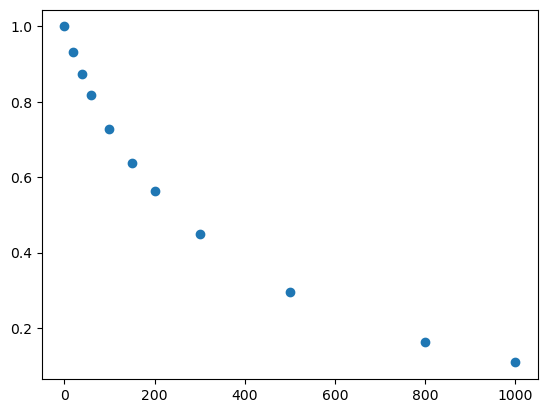

In [116]:
def biexp(b,f,D,Dstar):
    return f*np.exp(-b*Dstar) + (1-f)*np.exp(-b*D)

b = np.array([0,20,40,60,100,150,200,300,500,800,1000])
sig = biexp(b,0.2,0.002,0.01)
pl.scatter(b,sig)
pl.show()

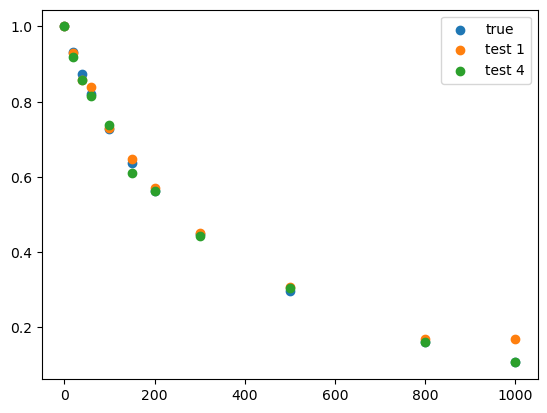

In [126]:
test1= NoiseRice(sig,0.02)
test2= NoiseRice_sigsquare(sig,0.02)
test3= NoiseRice_raw(sig,0.02)
test4= NoiseRice_Gauss(sig,0.02)

pl.scatter(b,sig,label = 'true')
pl.scatter(b,test1,label = 'test 1')
#pl.scatter(b,test2, label = 'test 2')
#pl.scatter(b,test3, label = 'test 3')
pl.scatter(b,test4, label = 'test 4')
pl.legend()
pl.show()